In [1]:
import sklearn
import numpy as np
import scipy as sp
import math
import pandas as pd
import os 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('1/train.csv')
train=train.drop(["id"],axis=1)

In [3]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 380.3 KB


In [5]:
test=pd.read_csv('1/test.csv')
test=test.drop(["id"],axis=1)

In [6]:
test.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000
mean,299.943523,55.803273,32.829154,184.345825,4.194230,990.222330,774.736311,49.153398
std,104.809283,80.938863,55.490684,17.964842,5.807567,76.812197,77.412505,63.564334
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,213.800000,0.000000,0.000000,174.900000,0.000000,938.200000,739.300000,7.000000
50%,300.000000,0.000000,0.000000,188.500000,0.000000,977.600000,781.500000,28.000000
75%,374.000000,117.200000,90.000000,192.000000,8.100000,1047.000000,821.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            3605 non-null   float64
 1   BlastFurnaceSlag           3605 non-null   float64
 2   FlyAshComponent            3605 non-null   float64
 3   WaterComponent             3605 non-null   float64
 4   SuperplasticizerComponent  3605 non-null   float64
 5   CoarseAggregateComponent   3605 non-null   float64
 6   FineAggregateComponent     3605 non-null   float64
 7   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 225.4 KB


In [8]:
test.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28


In [9]:
train.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [10]:
X_train,Y_train=train.iloc[:,0:8],train.iloc[:,8:]

In [11]:
Imputer=SimpleImputer(strategy='median')

array([[<AxesSubplot: title={'center': 'CementComponent'}>,
        <AxesSubplot: title={'center': 'BlastFurnaceSlag'}>,
        <AxesSubplot: title={'center': 'FlyAshComponent'}>],
       [<AxesSubplot: title={'center': 'WaterComponent'}>,
        <AxesSubplot: title={'center': 'SuperplasticizerComponent'}>,
        <AxesSubplot: title={'center': 'CoarseAggregateComponent'}>],
       [<AxesSubplot: title={'center': 'FineAggregateComponent'}>,
        <AxesSubplot: title={'center': 'AgeInDays'}>, <AxesSubplot: >]],
      dtype=object)

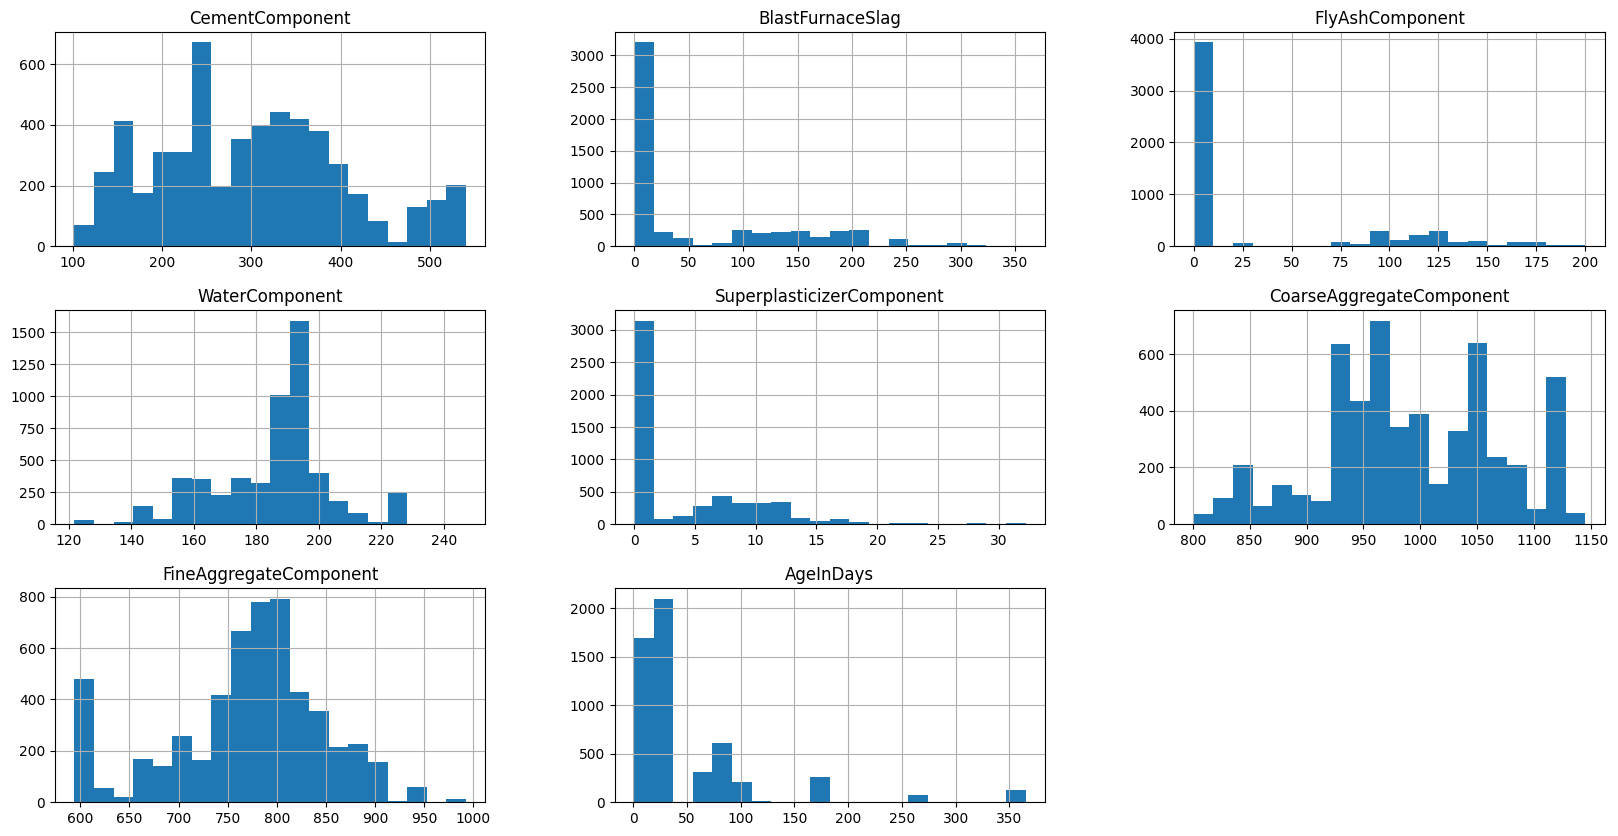

In [12]:
X_train.hist(bins=20,figsize=(20,10))

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])
X_train_add = num_pipeline.fit_transform(X_train)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_add, Y_train["Strength"])

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error
predictions1 = lin_reg.predict(X_train_add)
lin_mse = mean_squared_error(Y_train,predictions1)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

14.572023160626166


In [16]:
X_test = num_pipeline.fit_transform(test)
result=lin_reg.predict(X_test)
print(result)

[35.81904541 27.01248457 26.73861529 ... 35.61305242 54.30925864
 29.61508716]


In [17]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=200)
forest_reg.fit(X_train_add, Y_train["Strength"])

RandomForestRegressor(n_estimators=200)

In [18]:
from sklearn.metrics import mean_squared_error
predictions2 = forest_reg.predict(X_train_add)
forest_mse = mean_squared_error(Y_train,predictions2)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

8.194144287401814


In [19]:
X_test = num_pipeline.fit_transform(test)
results=forest_reg.predict(X_test)
print(results)

[52.20902453 20.26599963 37.20043576 ... 46.22543214 33.58338905
 25.80587774]


In [20]:
import csv

In [21]:
def writecsv(results,filename):
    fields=['id','Strength']
    with open(filename,'w',newline='') as f:
        fwriter=csv.writer(f)
        fwriter.writerow(fields)
        for i in range(len(results)):
            fwriter.writerow([i+5407,results[i]])

In [22]:
writecsv(results,"RandomTree.csv")

In [23]:
from sklearn.ensemble import AdaBoostRegressor
ada_regr = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_regr.fit(X_train_add,Y_train["Strength"])

AdaBoostRegressor(n_estimators=100, random_state=0)

In [24]:
from sklearn.metrics import mean_squared_error
predictions3 = ada_regr.predict(X_train_add)
ada_mse = mean_squared_error(Y_train,predictions3)
ada_mse = np.sqrt(ada_mse)
print(ada_mse)

12.528829122908363


In [25]:
X_test = num_pipeline.fit_transform(test)
res=ada_regr.predict(X_test)
print(res)

[48.15683119 21.52356532 38.85059172 ... 39.00198702 22.79005714
 21.52356532]


In [26]:
writecsv(res,"AdaBoost.csv")

In [27]:
pda=pd.DataFrame(train)
corr_matrix=pda.corr(numeric_only=True)

In [28]:
corr_matrix["Strength"]

CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
WaterComponent              -0.113678
SuperplasticizerComponent    0.208249
CoarseAggregateComponent    -0.098410
FineAggregateComponent      -0.073900
AgeInDays                    0.334204
Strength                     1.000000
Name: Strength, dtype: float64

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(n_estimators=100)
gbrt.fit(X_train_add,Y_train["Strength"])

GradientBoostingRegressor()

In [30]:
from sklearn.metrics import mean_squared_error
predictions4 = gbrt.predict(X_train_add)
gbrt_mse = mean_squared_error(Y_train,predictions4)
gbrt_mse = np.sqrt(gbrt_mse)
print(gbrt_mse)

11.564239604242381


In [31]:
X_test = num_pipeline.fit_transform(test)
resu=gbrt.predict(X_test)
print(resu)

[50.77759097 19.83243754 34.84336108 ... 39.68868843 36.18043033
 20.7146804 ]


In [32]:
writecsv(resu,"XGBoost.csv")

In [33]:
re=(resu+res+results)/3

In [34]:
writecsv(re,"Ensemble.csv")

In [35]:
re

array([50.3811489 , 20.5406675 , 36.96479618, ..., 41.63870253,
       30.85129217, 22.68137449])

In [36]:
from sklearn import svm

svm_reg=svm.SVR(kernel='rbf')
svm_reg.fit(X_train_add,Y_train["Strength"])

SVR()

In [37]:
from sklearn.metrics import mean_squared_error
predictions5 = svm_reg.predict(X_train_add)
svm_mse = mean_squared_error(Y_train,predictions5)
svm_mse = np.sqrt(svm_mse)
print(svm_mse)

13.233128629042628


In [38]:
X_test = num_pipeline.fit_transform(test)
resul=svm_reg.predict(X_test)
print(resul)

[38.75356958 20.21369245 26.21892639 ... 35.36308654 45.05900463
 27.29440595]


In [39]:
re=(resu+res+results+resul+result)/5

In [40]:
re

array([45.14321234, 21.7696359 , 32.77038605, ..., 39.17844931,
       38.38442796, 24.99072331])

In [41]:
writecsv(re,"Ensemble2.csv")

In [42]:
feature=np.c_[predictions5,predictions4,predictions3,predictions2,predictions1]

In [43]:
feature

array([[29.96723034, 20.89045557, 20.28824742, 14.47746893, 33.20781301],
       [34.40906334, 34.15467811, 37.89595195, 28.0009875 , 35.65557906],
       [29.78444502, 39.35811323, 39.00198702, 37.37892616, 31.81006741],
       ...,
       [28.83683815, 36.39709863, 42.14184886, 38.26187519, 29.08458464],
       [43.5295806 , 48.04587062, 47.51316814, 43.08795667, 42.03413821],
       [36.97440101, 47.33237277, 49.76500473, 59.46787381, 35.80297801]])

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(n_estimators=100)
gbrt.fit(feature,Y_train["Strength"])

GradientBoostingRegressor()

In [45]:
r=np.c_[resul,resu,res,results,result]

In [46]:
resul=gbrt.predict(r)
print(resul)

[52.99746469 20.15861455 37.45833308 ... 48.83491665 33.68138902
 26.47649999]


In [47]:
writecsv(resul,"Stacking.csv")

In [48]:
from sklearn.linear_model import LinearRegression

li=LinearRegression()
li.fit(feature,Y_train["Strength"])

LinearRegression()

In [49]:
p=li.predict(r)
print(p)

[52.96104923 20.85723072 38.29695339 ... 48.73243864 32.96805638
 27.74940854]


In [50]:
train["AgeInDays"].value_counts()

28     2097
7       796
3       639
90      540
56      313
180     264
14      249
100     212
365      91
270      75
91       73
360      37
120      15
1         5
49        1
Name: AgeInDays, dtype: int64

In [51]:
test["AgeInDays"].value_counts()

28     1377
7       549
3       414
90      382
56      213
180     190
14      186
100     122
91       51
270      41
365      40
120      21
360      15
1         3
11        1
Name: AgeInDays, dtype: int64